# Figure 2: Functional Ca2+ imaging in *ex-vivo* wild-type and *rd10* mouse retina

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import data_plots

In [2]:
pd.DataFrame.iteritems = pd.DataFrame.items

# --------------------------------------------------------------------

# Load data

In [3]:
file_path = '../data/field_location_df.h5'  # Adjust path to file if necessary
location_df = pd.read_hdf(file_path, key='df')

In [4]:
location_df.keys()

Index(['age', 'genline', 'ventral_dorsal_pos_um', 'temporal_nasal_pos_um'], dtype='object')

# --------------------------------------------------------------------

# Helper functions



In [5]:
def plot_location_grid(ax, text=True, left='n', right='t', top='d', bottom='v', rad=1):
    radians = np.linspace(0, 2 * np.pi, 100)
    grid_kw = dict(c='gray', alpha=1, zorder=-10, clip_on=False)
    ax.plot(rad * np.sin(radians), rad * np.cos(radians), **grid_kw)
    ax.plot(rad * 0.5 * np.sin(radians), rad * 0.5 * np.cos(radians), **grid_kw)
    ax.plot([-rad, rad], [0, 0], **grid_kw)
    ax.plot([0, 0], [-rad, rad], **grid_kw, )

    # Labels
    if text:
        text_kw = dict(c='dimgray', fontsize=plt.rcParams['axes.titlesize'])
        ax.text(x=-1.1 * rad, y=0, s=left, ha='right', va='center', **text_kw)
        ax.text(x=1.1 * rad, y=0, s=right, ha='left', va='center', **text_kw)
        ax.text(x=0, y=1.1 * rad, s=top, ha='center', va='bottom', **text_kw)
        ax.text(x=0, y=-1.1 * rad, s=bottom, ha='center', va='top', **text_kw)

# --------------------------------------------------------------------

# Plot locations

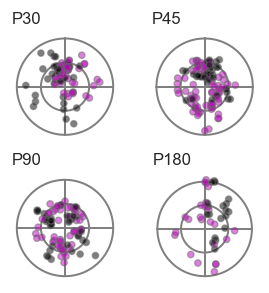

In [8]:
# Set context
data_plots.set_rc_params(kind='paper', notebook_dpi=120)

# Create plot
fig, axs = plt.subplots(2, 2, figsize=(2.3, 2.3))
axs = axs.flatten()

# Scatter plot parameters
scatter_kws = dict(s=15, edgecolor='dimgray', alpha=0.5)

ages = ['P30', 'P45', 'P90', 'P180']

for i, age in enumerate(ages):
    ax = axs[i]

    # Filter data for the current age
    df_age = location_df[location_df['age'] == age].copy()

    # Map genline to labels (0 for 'Bl6', 1 for 'rd10')
    df_age['label'] = df_age['genline'].map({'Bl6': 0, 'rd10': 1})

    # Shuffle data
    df_shuffled = df_age.sample(frac=1, random_state=42).reset_index(drop=True)

    # Extract positions and labels
    shuffled_vd = df_shuffled['ventral_dorsal_pos_um']
    shuffled_tn = df_shuffled['temporal_nasal_pos_um']
    shuffled_labels = df_shuffled['label']

    # Assign colors based on labels
    colors = ['k' if label == 0 else 'm' for label in shuffled_labels]

    # Plot data
    ax.scatter(-shuffled_tn, shuffled_vd, color=colors, **scatter_kws)

    # Set axis properties
    ax.set_aspect('equal', 'box')
    ax.set_title(age, loc='left', fontsize=10)
    ax.axis('off')

    # Add location grid
    plot_location_grid(ax, text=False, left='n', right='t', top='d', bottom='v', rad=2500)

# Similar to standard tight_layout, but relative to fontsize used
data_plots.tight_layout(rect=(0.01, 0, 1, 1))

# Save the plot if needed
# plt.savefig('Fig3_field_locations.pdf', bbox_inches='tight')

plt.show()

# --------------------------------------------------------------------

# Count fields

In [9]:
file_path = '../data/field_df.h5'  # Adjust path to file if necessary
field_df = pd.read_hdf(file_path, key='df')

In [10]:
location_df.keys()

Index(['age', 'genline', 'ventral_dorsal_pos_um', 'temporal_nasal_pos_um'], dtype='object')

In [11]:
# Group by genline and animrem, and count unique fields
field_count_df = (
    field_df.groupby(['genline', 'animrem'])
    .agg(num_fields=('field', 'nunique'))
    .reset_index()
)

# Print the summary DataFrame
print(field_count_df)


  genline animrem  num_fields
0     Bl6    P180           6
1     Bl6     P30           6
2     Bl6     P45          11
3     Bl6     P90           8
4    rd10    P180           8
5    rd10     P30           9
6    rd10     P45          14
7    rd10     P90           9


# --------------------------------------------------------------------